#  Analyzing and Making Predictions of Tech Stocks
In this project, I will use pandas to analyze data, including value, risk and return metrics, of the prominent 'MAG7' companies: Facebook, Microsoft, Apple, Amazon, Tesla, Nvidia and Google. Here are some of the questions I'll address in this notebook:



What was the change in our stock’s price over time?
What was the moving average of our stocks?
What was the daily return average of a stock?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future 'FAANG'-stock behavior?

In [2]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

I will be comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [3]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','TSLA','NVDA','META']


end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Netflix in the previous year.

In [4]:

GOOG.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,173.725689,175.777864,171.845148,173.807772,1.973531e+07
std,13.204182,13.086929,13.225073,13.040901,9.099064e+06
min,146.580002,151.059998,142.660004,143.389999,6.809800e+06
25%,164.146561,166.352055,162.964247,164.405968,1.406660e+07
50%,171.832352,173.597746,169.558825,171.300003,1.696680e+07
75%,182.942429,185.084718,182.075533,183.590841,2.210910e+07
max,207.473633,208.462496,204.027547,204.267279,7.872980e+07


In [5]:
TSLA.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,278.412651,285.223012,271.091286,278.299277,9.713391e+07
std,76.576705,78.772644,74.362079,77.038662,3.798862e+07
min,170.660004,174.750000,167.410004,171.119995,3.716760e+07
25%,220.889999,225.990005,216.800003,221.589996,6.811330e+07
50%,252.940002,259.750000,246.210007,253.600006,8.740390e+07
75%,338.589996,346.959991,334.299988,341.089996,1.155514e+08
max,479.859985,488.540009,457.510010,475.899994,2.217073e+08


In [6]:
META.describe()

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,567.579368,575.475140,559.349413,567.774033,1.456796e+07
std,64.405465,65.123240,63.420406,64.580495,6.459192e+06
min,452.210480,462.323638,441.478936,450.155930,4.726100e+06
25%,511.762543,521.496710,504.362133,512.889536,1.035660e+07
50%,571.470215,576.521611,563.553656,570.252212,1.299300e+07
75%,607.209778,614.250000,597.918084,607.529492,1.691980e+07
max,736.015198,740.251419,724.975032,735.345771,4.898940e+07


In [7]:
MSFT.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,417.576365,421.228918,413.404794,417.364286,2.159073e+07
std,21.740430,21.033072,22.313889,21.765889,8.527238e+06
min,353.910278,363.812108,344.158197,350.237034,7.164500e+06
25%,407.156525,410.910163,404.325501,406.473572,1.638760e+07
50%,418.241608,422.337622,414.184455,418.152124,1.948690e+07
75%,432.555908,436.683682,428.713044,432.076757,2.350870e+07
max,464.002502,464.786500,460.926110,463.446749,6.426370e+07


In [8]:
NVDA.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,124.380456,126.868099,121.657628,124.459988,2.949570e+08
std,13.231389,13.110894,13.547301,13.583877,1.195656e+08
min,94.309998,95.168731,86.620003,87.459999,1.051570e+08
25%,114.787277,116.971181,112.269672,114.612338,2.157490e+08
50%,124.269379,126.848738,121.150145,123.950064,2.647050e+08
75%,135.339996,138.487263,133.477730,136.448057,3.392464e+08
max,149.416245,153.115916,147.806407,153.015919,8.350650e+08


In [9]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,222.661921,224.923986,219.966555,222.276306,5.603747e+07
std,16.031036,15.590339,16.401356,16.206125,3.248402e+07
min,172.194199,189.692870,168.988411,171.724805,2.323470e+07
25%,213.210419,215.741063,210.615041,212.934166,3.950540e+07
50%,224.458542,226.104579,222.238802,224.199183,4.801330e+07
75%,232.582443,234.316353,229.187143,232.502737,6.023480e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [ ]:
AMZN.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-07-16 to 2019-07-15
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Change in Stock Price Over Time

<Axes: xlabel='Date'>

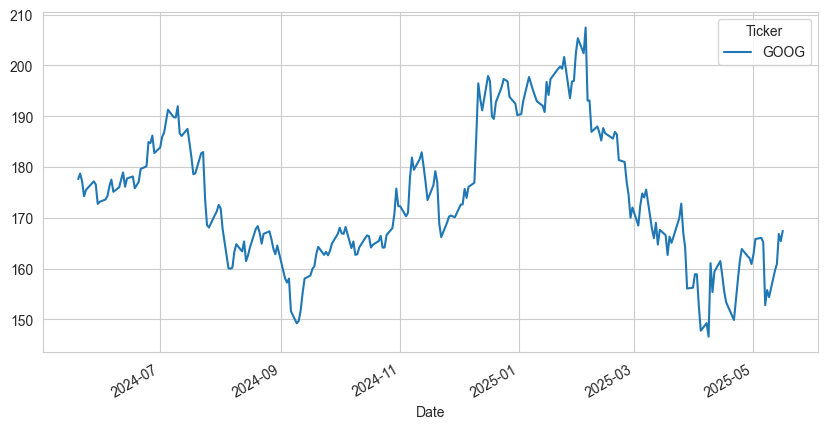

In [10]:
GOOG['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

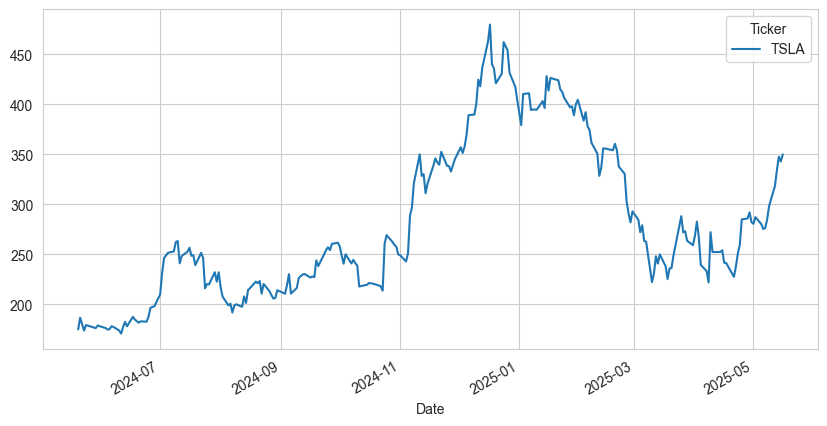

In [11]:
TSLA['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

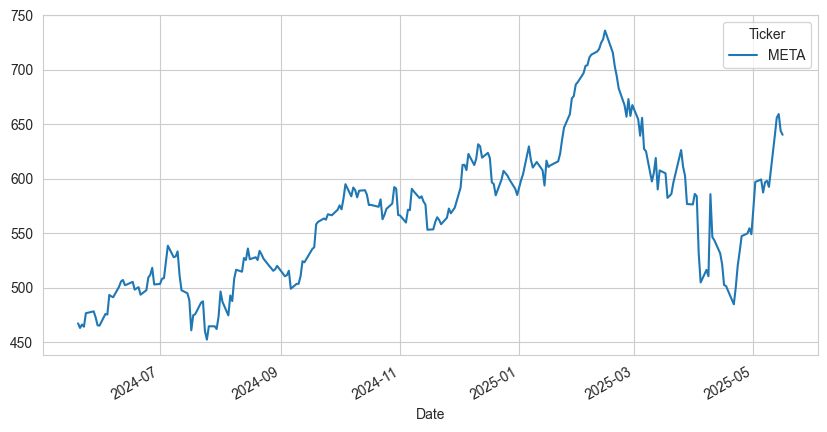

In [12]:
META['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

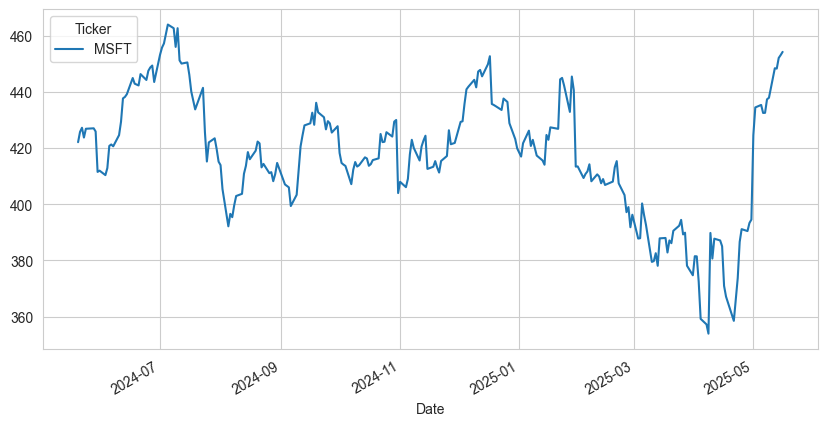

In [13]:
MSFT['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

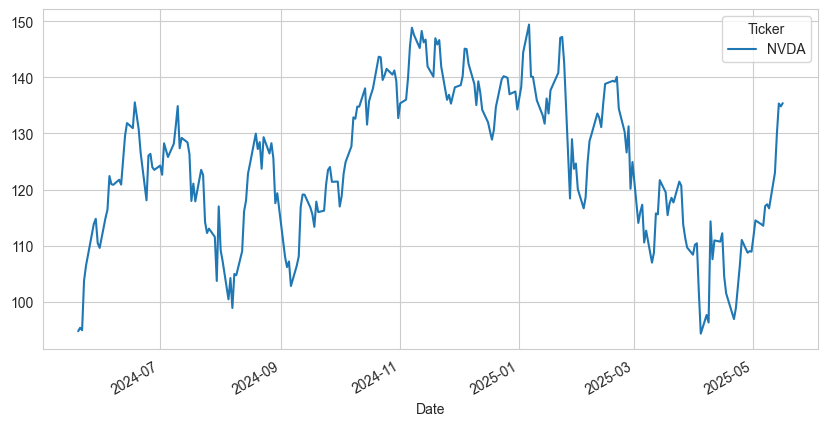

In [14]:

NVDA['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

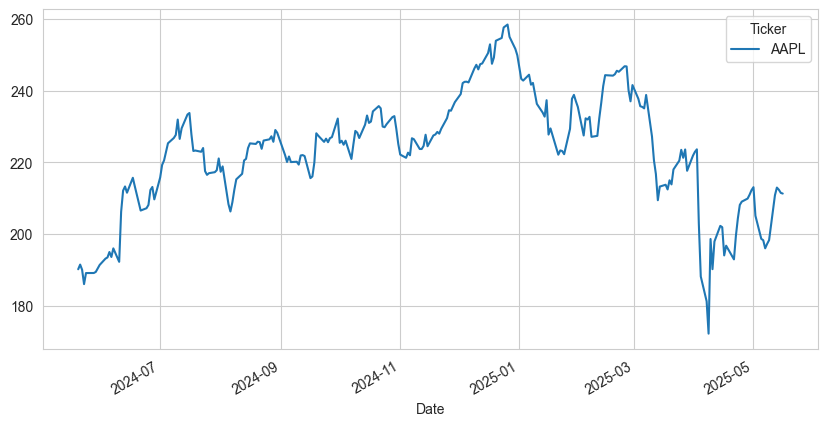

In [15]:
AAPL['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

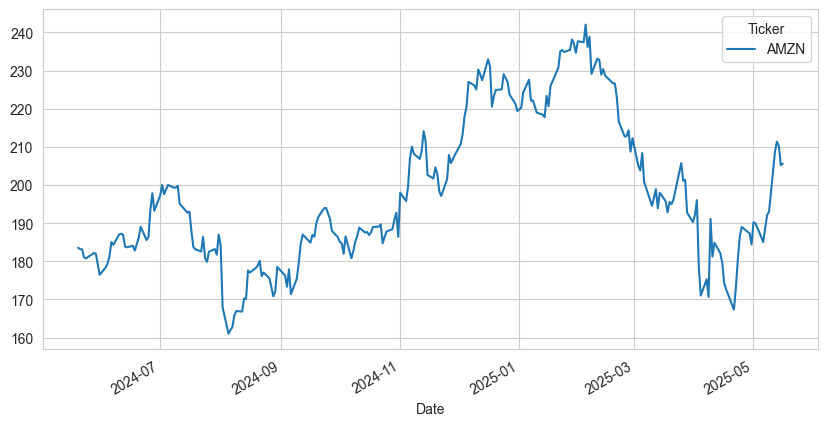

In [16]:
AMZN['Close'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

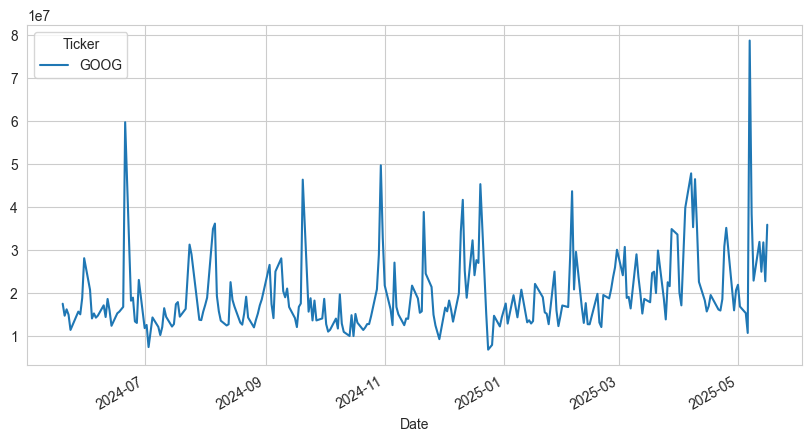

In [17]:
GOOG['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

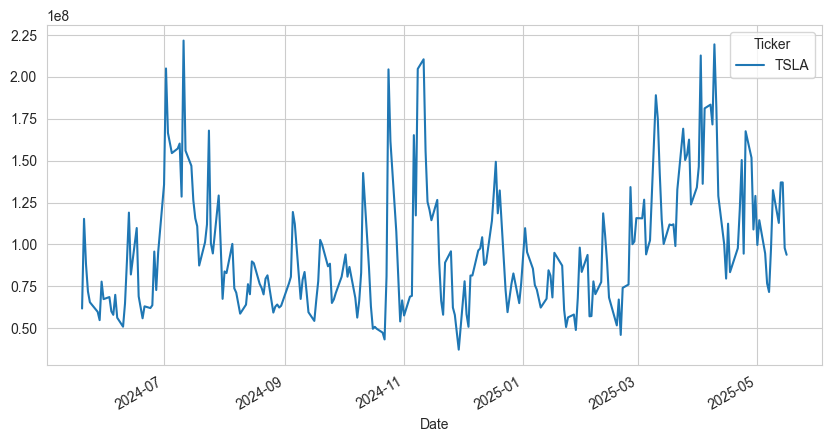

In [18]:
TSLA['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

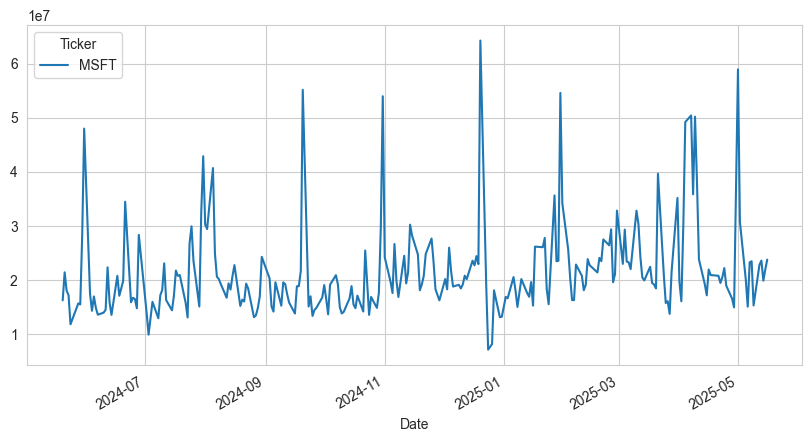

In [19]:
MSFT['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

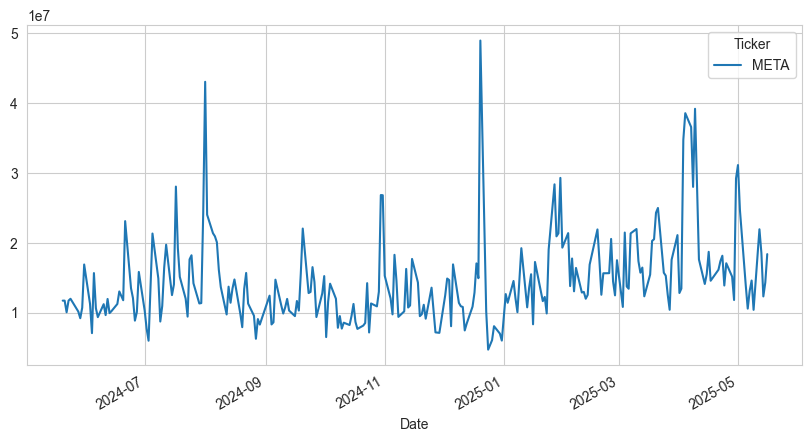

In [20]:
META['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

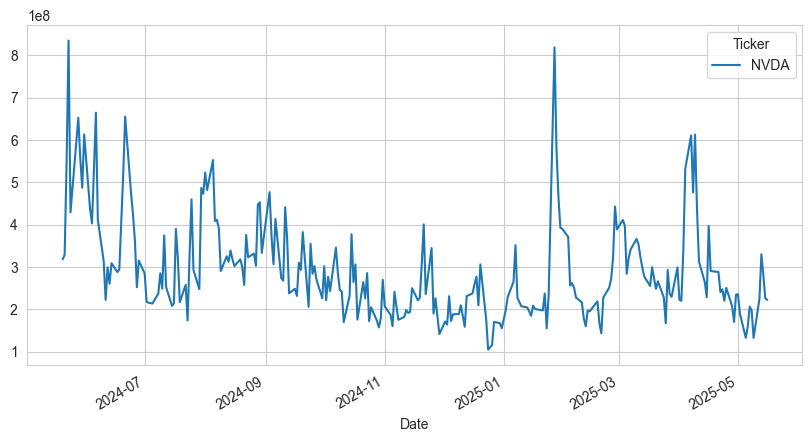

In [21]:
NVDA['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

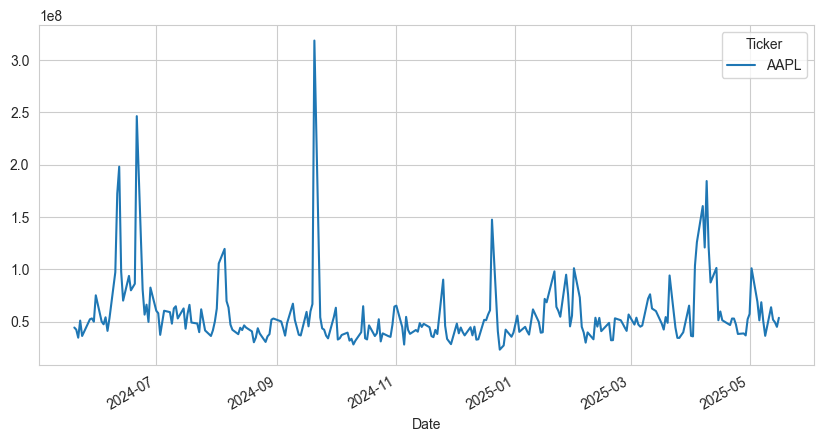

In [22]:
AAPL['Volume'].plot(legend = True, figsize = (10,5))


<Axes: xlabel='Date'>

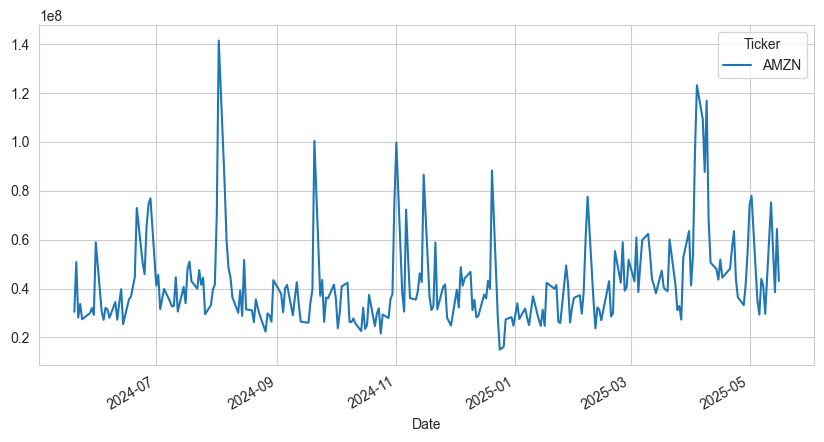

In [23]:
AMZN['Volume'].plot(legend = True, figsize = (10,5))


## Calculating Moving Averages

In [24]:
averages = [10, 25, 50]
for avg in averages:
    label = f"MAvg for {avg} days"
    GOOG[label] = GOOG['Close'].rolling(window=avg).mean()
    TSLA[label] = TSLA['Close'].rolling(window=avg).mean()
    META[label] = META['Close'].rolling(window=avg).mean()
    MSFT[label] = MSFT['Close'].rolling(window=avg).mean()
    NVDA[label] = NVDA['Close'].rolling(window=avg).mean()
    AAPL[label] = AAPL['Close'].rolling(window=avg).mean()
    AMZN[label] = AMZN['Close'].rolling(window=avg).mean()


In [25]:
GOOG.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,
2025-05-12,159.580002,160.440002,157.889999,159.100006,31884900,160.531000,158.207599,161.734485
2025-05-13,160.889999,162.059998,157.580002,159.919998,24944300,160.414000,158.673599,161.582924
2025-05-14,166.809998,168.339996,160.929993,161.309998,31769200,161.006000,159.482799,161.470852
2025-05-15,165.399994,167.509995,163.839996,167.139999,22717600,161.267000,159.656399,161.283035
2025-05-16,167.429993,170.649994,166.949997,168.929993,35876900,161.428999,160.138799,161.151399


<Axes: xlabel='Date'>

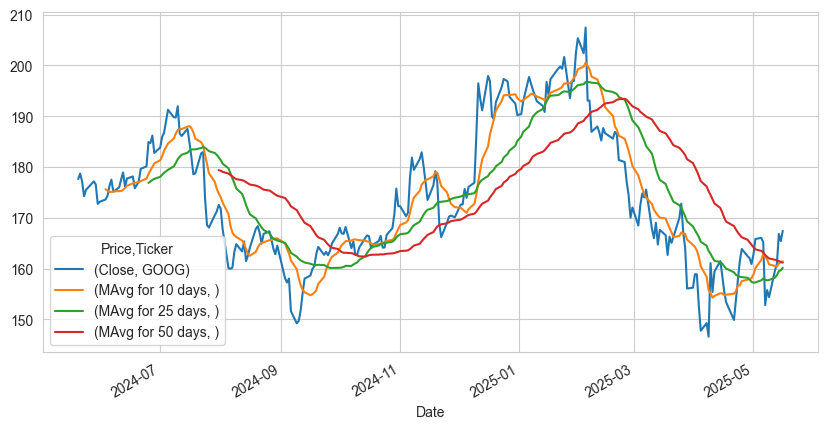

In [26]:
GOOG[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


In [27]:
TSLA.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2025-05-12,318.380005,322.209991,311.500000,321.989990,112826700,287.521002,265.728002,261.462002
2025-05-13,334.070007,337.589996,316.799988,320.000000,136992600,291.725003,269.759203,262.450402
2025-05-14,347.679993,350.000000,337.000000,342.500000,136997300,298.277002,274.792003,263.963202
2025-05-15,342.820007,346.140015,334.720001,340.339996,97882600,304.507004,277.616802,265.237602
2025-05-16,349.980011,351.619995,342.329987,346.239990,93811800,310.784006,281.520003,266.968202


<Axes: xlabel='Date'>

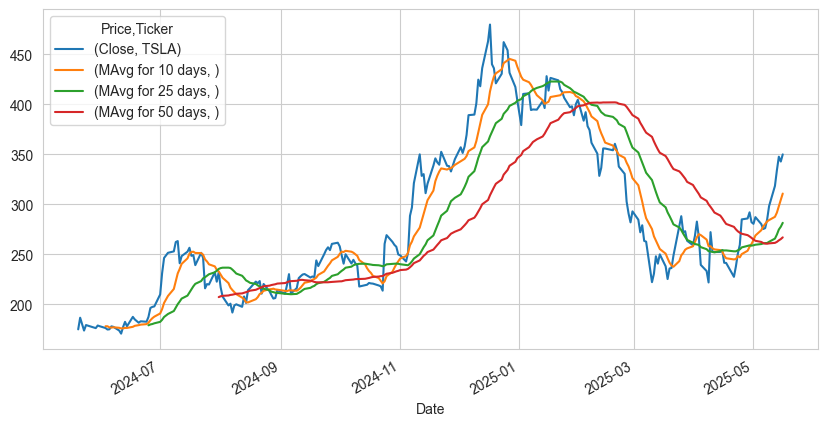

In [28]:
TSLA[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


In [29]:
META.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,META,META,META,META,META,,,
Date,,,,,,,,
2025-05-12,639.429993,640.390015,621.030029,630.919983,21965100,588.599005,551.219205,575.475306
2025-05-13,656.030029,660.919983,642.830017,645.539978,18570800,598.758008,556.810406,575.506553
2025-05-14,659.359985,662.669983,654.309998,661.210022,12348200,609.794006,562.766805,575.905131
2025-05-15,643.880005,657.309998,638.580017,654.280029,14341800,616.961005,565.091205,575.665001
2025-05-16,640.340027,640.440002,626.150024,637.960022,18405900,621.293005,568.853207,575.924365


<Axes: xlabel='Date'>

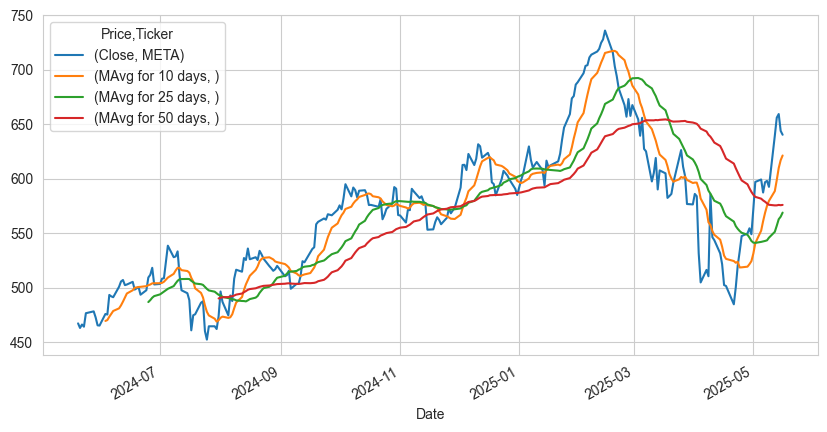

In [30]:
META[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


In [31]:
MSFT.tail()


Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,
Date,,,,,,,,
2025-05-12,448.436737,448.546521,438.974098,445.122814,22821900,427.112891,396.681755,390.746251
2025-05-13,448.316986,449.844181,444.543884,446.959462,23618800,432.612796,400.326266,391.957029
2025-05-14,452.109985,453.068218,447.318794,447.318794,19902800,438.370224,404.254254,393.241271
2025-05-15,453.130005,456.190002,450.429993,450.769989,21992300,441.221179,406.788478,394.298169
2025-05-16,454.269989,454.359985,448.730011,452.049988,23803400,443.199942,409.733230,395.460314


<Axes: xlabel='Date'>

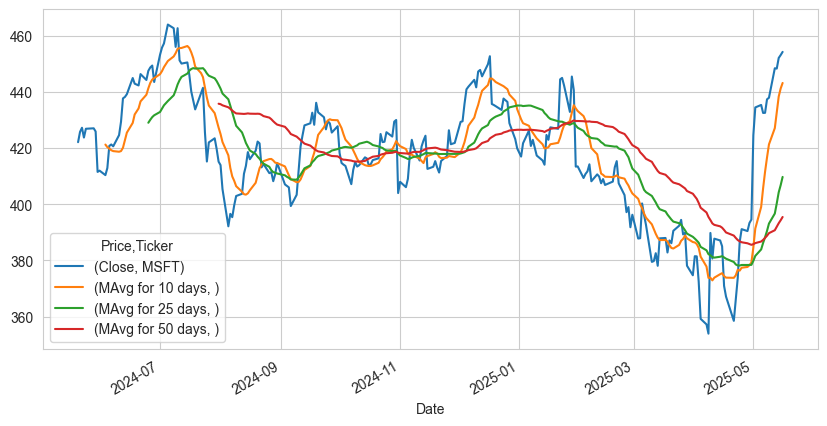

In [32]:
MSFT[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))
 

In [33]:
NVDA.tail()


Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,
Date,,,,,,,,
2025-05-12,123.000000,123.000000,120.279999,121.970001,225023300,114.549000,109.033200,111.116554
2025-05-13,129.929993,131.220001,124.470001,124.980003,330430100,116.639999,110.324800,111.434163
2025-05-14,135.339996,135.440002,131.679993,133.199997,281180800,119.281999,111.886400,111.821377
2025-05-15,134.830002,136.300003,132.660004,134.289993,226632600,121.603999,112.706400,112.172192
2025-05-16,135.399994,136.350006,133.460007,136.220001,222651500,123.693999,113.819599,112.668996


<Axes: xlabel='Date'>

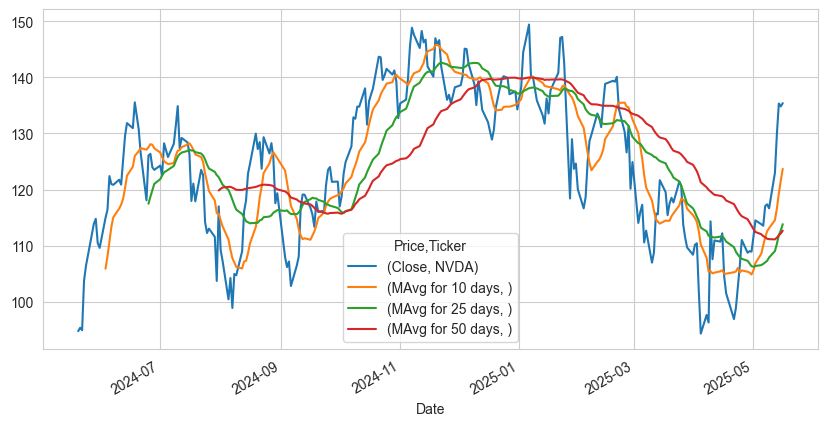

In [34]:
NVDA[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


In [35]:
AAPL.tail()


Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,204.044070,199.962438,210.144956
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,204.243730,201.230743,209.649191
2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800,204.254559,202.836176,209.183371
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500,204.095496,203.350592,208.703745
2025-05-16,211.259995,212.570007,209.770004,212.360001,53659100,204.713388,204.194167,208.228509


<Axes: xlabel='Date'>

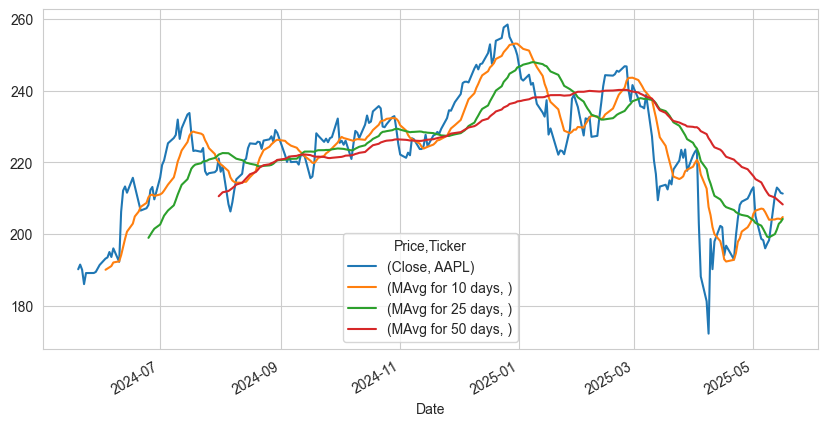

In [36]:
AAPL[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


In [37]:
AMZN.tail()


Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,
Date,,,,,,,,
2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000,190.584000,184.077200,190.1642
2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700,192.981999,185.521600,190.2912
2025-05-14,210.250000,211.929993,208.850006,211.449997,38492100,195.564999,187.105200,190.4202
2025-05-15,205.169998,206.880005,202.669998,206.449997,64347300,197.062000,187.667999,190.3564
2025-05-16,205.589996,206.850006,204.369995,206.850006,43072700,198.623000,188.642799,190.4542


<Axes: xlabel='Date'>

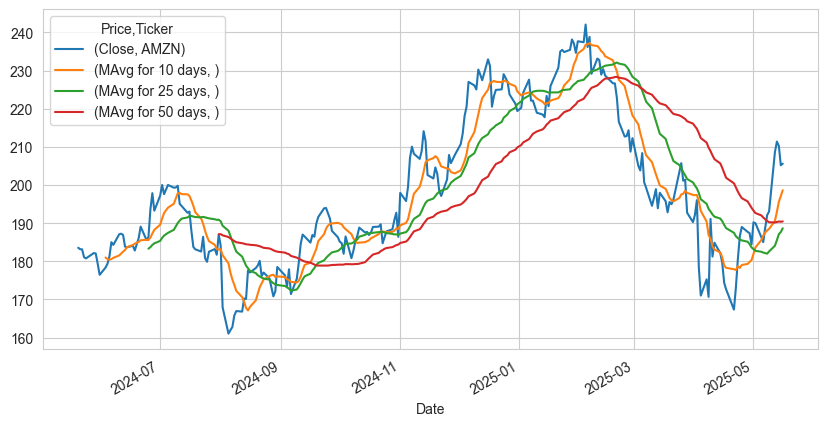

In [38]:
AMZN[['Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))


## Daily Return Averages.


In [40]:

TSLA['Daily Return'] = TSLA['Close'].pct_change()
TSLA.tail()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,
2025-05-12,318.380005,322.209991,311.500000,321.989990,112826700,287.521002,265.728002,261.462002,0.067458
2025-05-13,334.070007,337.589996,316.799988,320.000000,136992600,291.725003,269.759203,262.450402,0.049281
2025-05-14,347.679993,350.000000,337.000000,342.500000,136997300,298.277002,274.792003,263.963202,0.040740
2025-05-15,342.820007,346.140015,334.720001,340.339996,97882600,304.507004,277.616802,265.237602,-0.013978
2025-05-16,349.980011,351.619995,342.329987,346.239990,93811800,310.784006,281.520003,266.968202,0.020886


<Axes: xlabel='Date'>

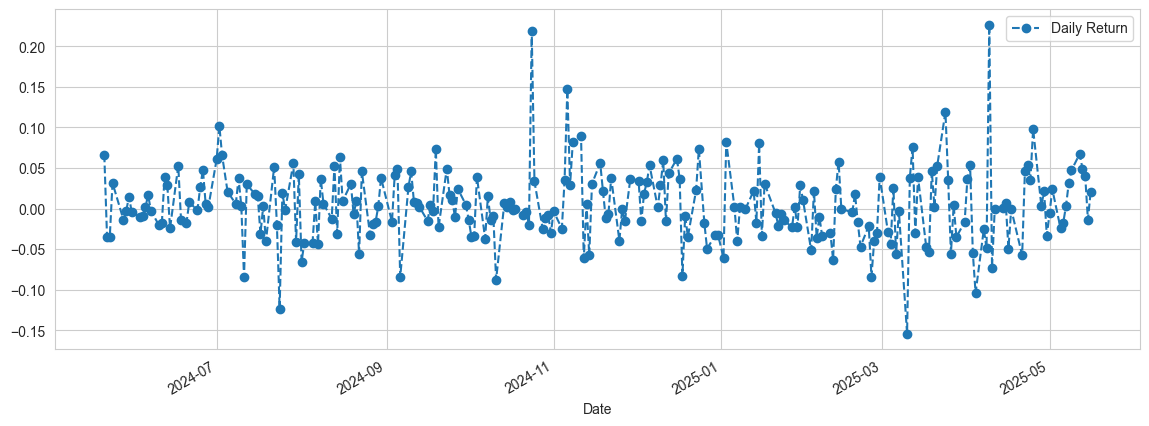

In [41]:
TSLA['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')


C:\Users\Benson Peter D\AppData\Local\Temp\ipykernel_22172\1541002563.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='red')


<Axes: xlabel='Daily Return', ylabel='Density'>

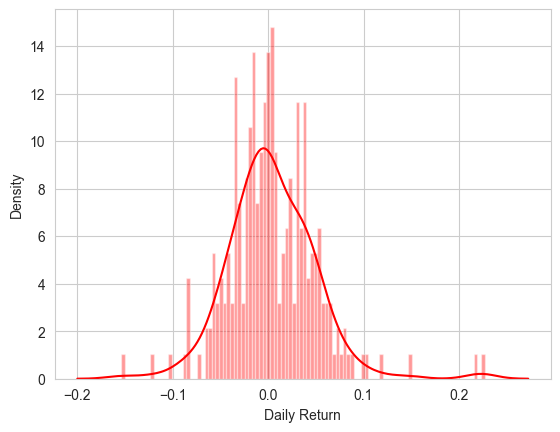

In [42]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='red')


## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [43]:
close_compr = yf.download(stock_list,start,end)['Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()


[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2025-05-12,0.063146,0.080700,0.033683,0.079225,0.024001,0.054436,0.067458
2025-05-13,0.010152,0.013085,0.008209,0.025961,-0.000267,0.056341,0.049281
2025-05-14,-0.002818,-0.005299,0.036795,0.005076,0.008461,0.041638,0.040740
2025-05-15,-0.004145,-0.024162,-0.008453,-0.023477,0.002256,-0.003768,-0.013978
2025-05-16,-0.000899,0.002047,0.012273,-0.005498,0.002516,0.004227,0.020886


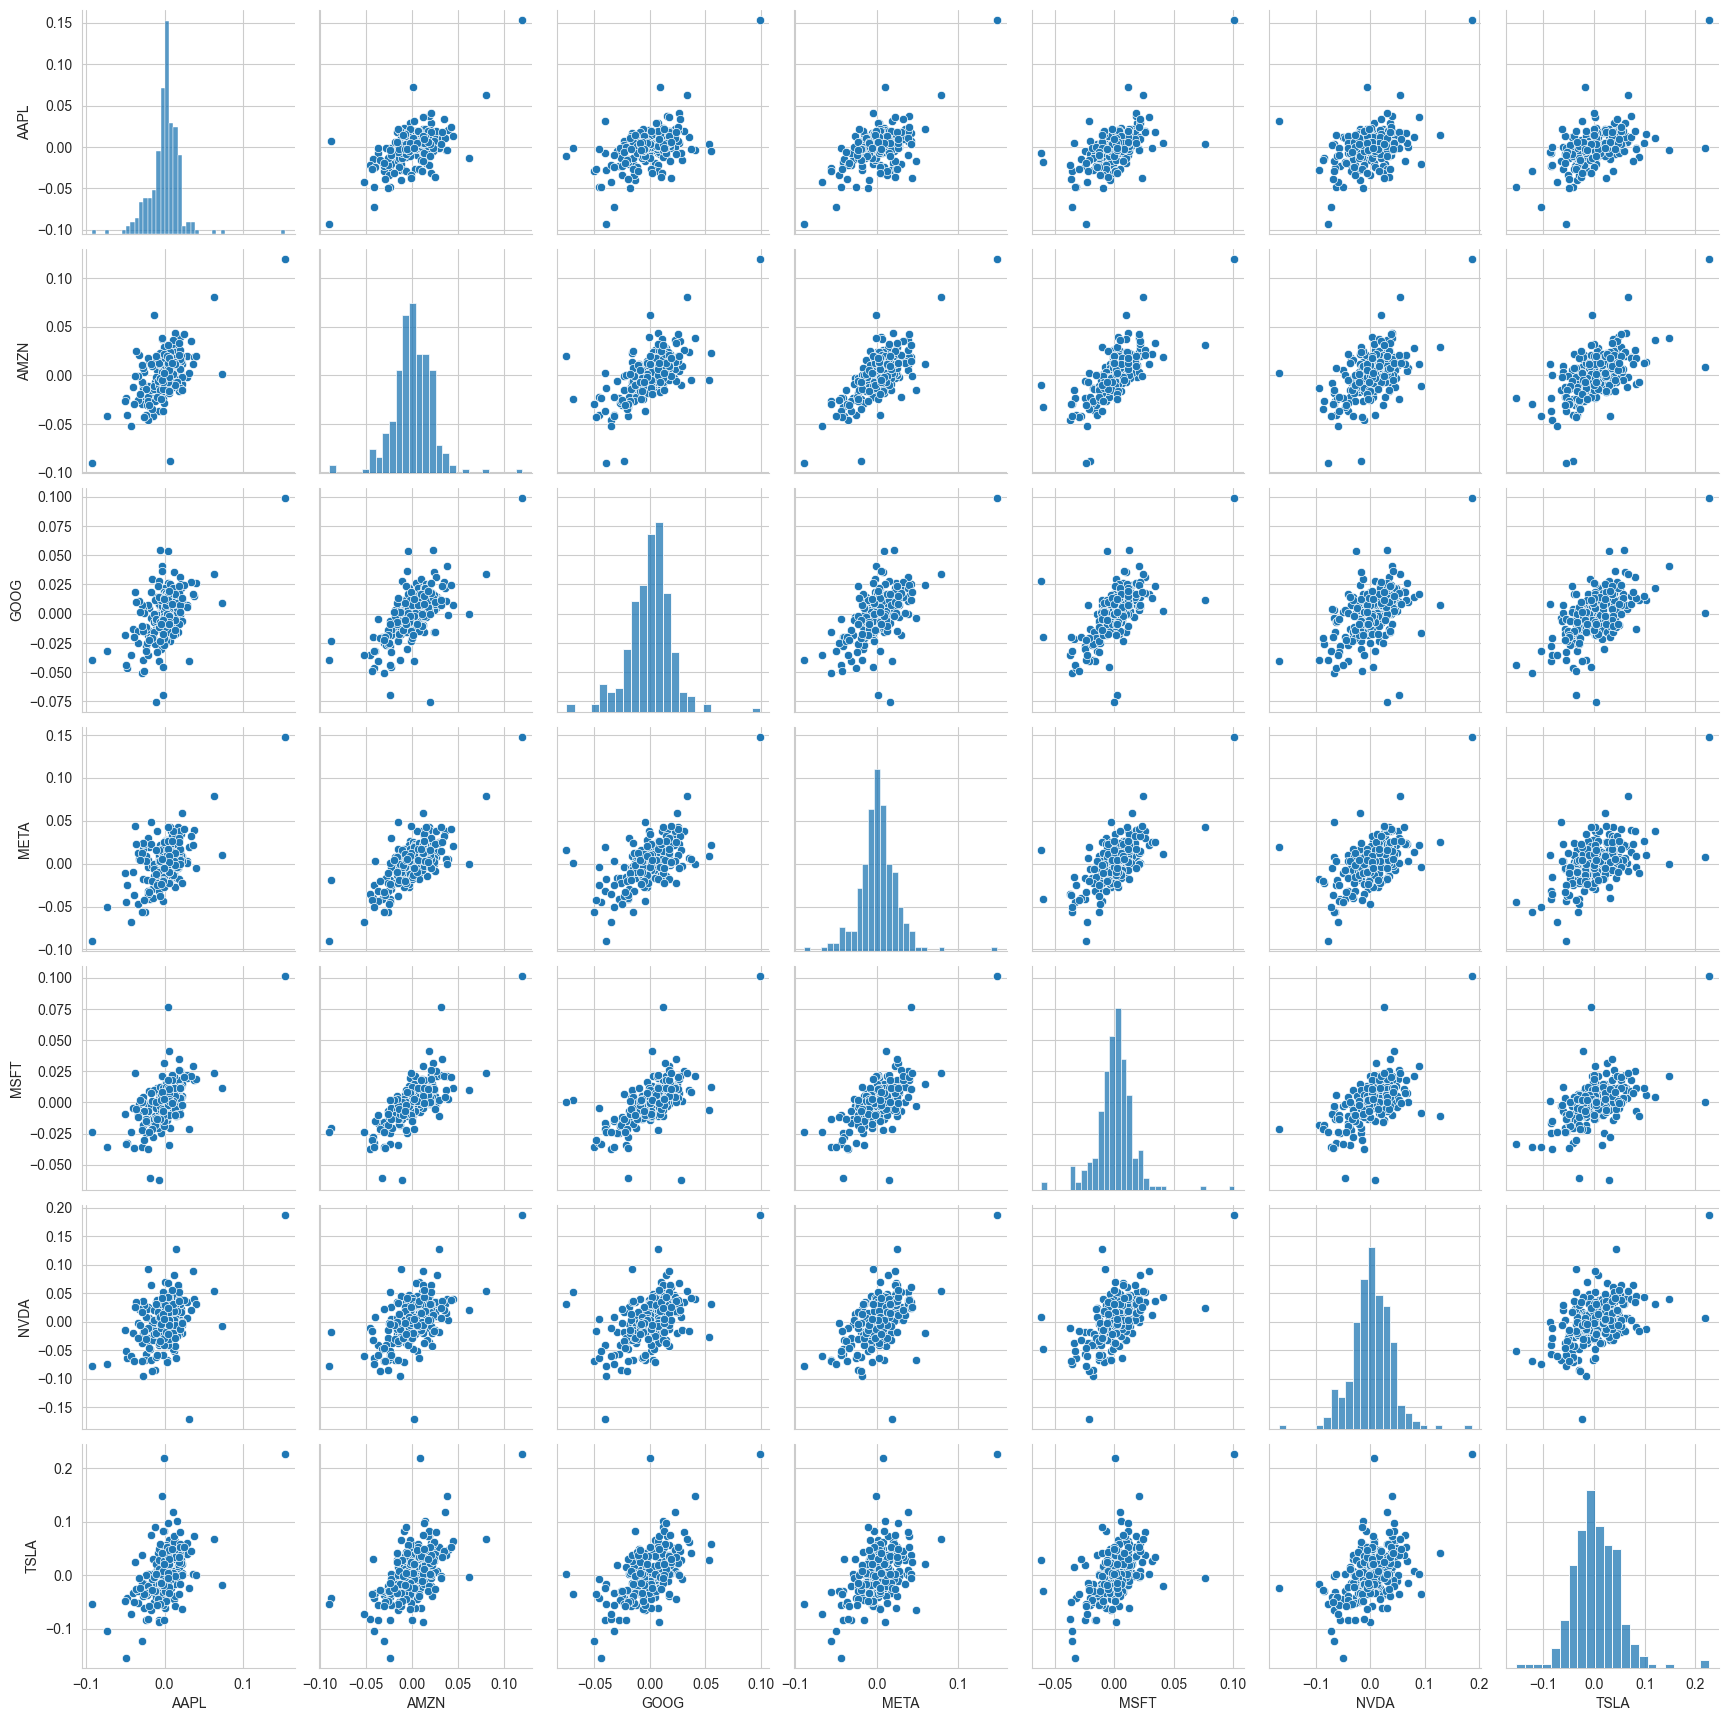

In [44]:
sns.pairplot(rets_compr.dropna())


Ticker      AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA
Ticker                                                                      
AAPL    1.000000  0.582563  0.532181  0.569751  0.589487  0.421799  0.505049
AMZN    0.582563  1.000000  0.654385  0.729026  0.713890  0.550591  0.576640
GOOG    0.532181  0.654385  1.000000  0.623953  0.615390  0.492372  0.577676
META    0.569751  0.729026  0.623953  1.000000  0.673287  0.565246  0.521189
MSFT    0.589487  0.713890  0.615390  0.673287  1.000000  0.586878  0.519593
NVDA    0.421799  0.550591  0.492372  0.565246  0.586878  1.000000  0.477287
TSLA    0.505049  0.576640  0.577676  0.521189  0.519593  0.477287  1.000000


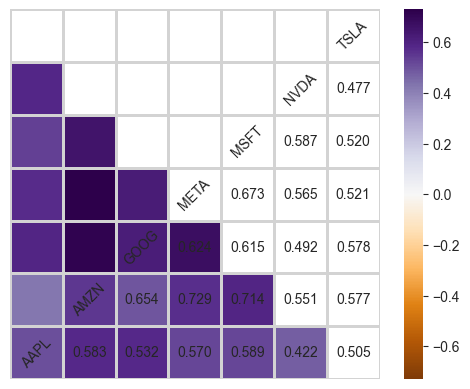

In [45]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()


## Determining Value from Risk vs. Expected Return

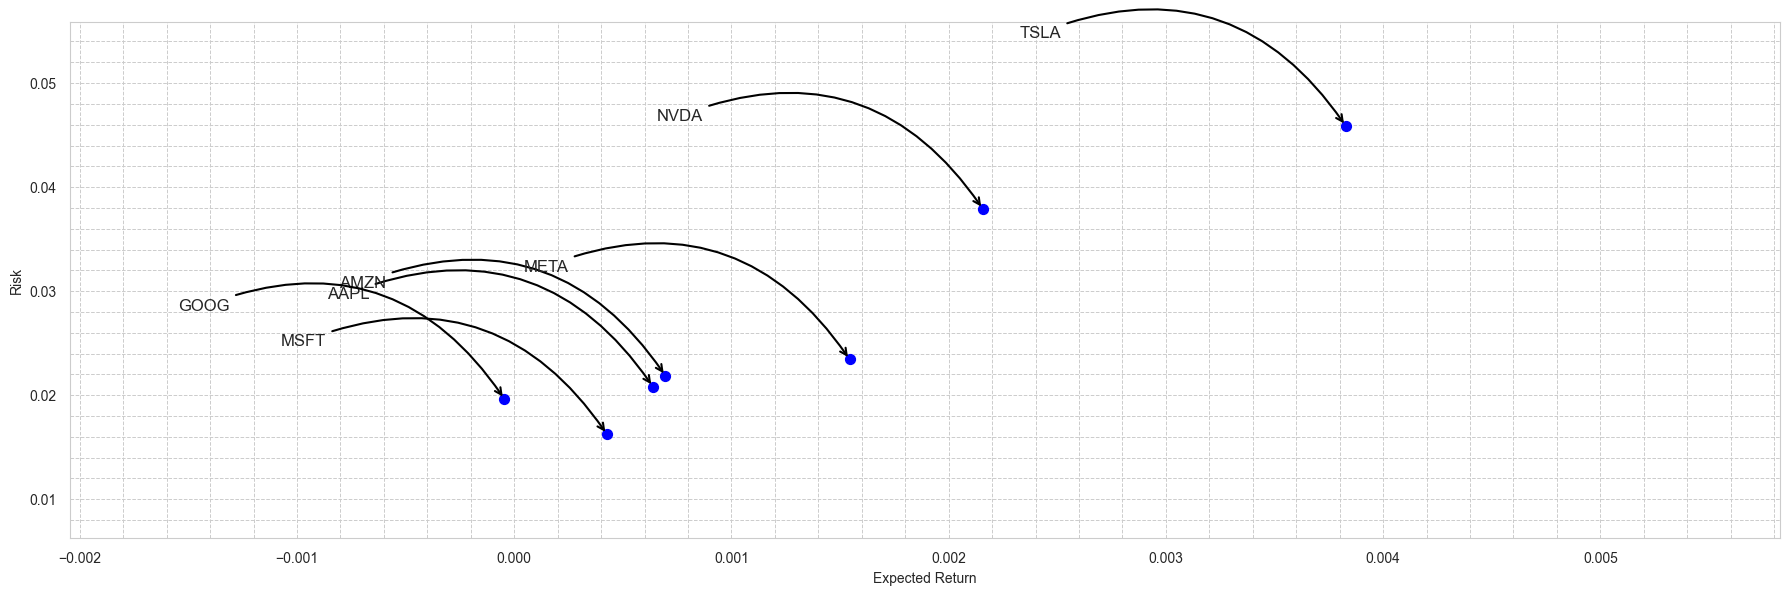

In [46]:
rets_filled = rets_compr.dropna()

# Get mean and std
mean_returns = rets_filled.mean()
std_devs = rets_filled.std()

# Plot setup
plt.figure(figsize=(18, 6))
plt.scatter(mean_returns, std_devs, s=50, color='blue')

# Label axes
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Annotate with arrows
for label, x, y in zip(rets_filled.columns, mean_returns, std_devs):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(x - 0.0015, y + 0.0085),  # Offset
        textcoords='data',
        fontsize=12,
        arrowprops=dict(
            arrowstyle='->',
            color='black',
            lw=1.5,
            connectionstyle='arc3,rad=-0.4'
        )
    )

# Fully expanded grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Set dynamic x and y limits with padding
x_pad = 0.002
y_pad = 0.01
plt.xlim(mean_returns.min() - x_pad, mean_returns.max() + x_pad)
plt.ylim(std_devs.min() - y_pad, std_devs.max() + y_pad)

plt.tight_layout()
plt.show()

Key Observations
1. High Return, High Risk
TSLA (Tesla):
Has one of the highest risks (~0.046) and moderate expected return.
Suggests high volatility — good for aggressive investors, but carries significant downside risk.

NVDA (NVIDIA):
Highest expected return among the group (~0.0035) with moderate-high risk (~0.035).Attractive for growth-focused investors.

2. Moderate Return, Moderate Risk
META, AMZN:
Offer a balance of return and risk.META has a slightly lower return than NVDA but with slightly lower risk too.

AMZN appears slightly less risky than META.

3. Low Risk, Low Return
MSFT, AAPL, GOOG:
Clustered toward the lower-left, indicating lower volatility and conservative returns.
Suitable for defensive or risk-averse investors.

4. Negative Expected Return
MSFT, AAPL, GOOG:
All exhibit slightly negative expected returns in this dataset.
Indicates that over the selected timeframe, they underperformed, despite being low-risk.

This could be a result of recent drawdowns or market conditions.


In [47]:
rets_compr.head()


Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-21,0.006857,-0.002125,0.006052,-0.008980,0.008699,0.006394,0.066591
2024-05-22,-0.007538,-0.000109,-0.008577,0.006780,0.003450,-0.004571,-0.034780
2024-05-23,-0.021058,-0.011358,-0.016517,-0.004276,-0.008176,0.093196,-0.035367
2024-05-24,0.016588,-0.001657,0.007255,0.026708,0.007400,0.025723,0.031656


In [48]:
rets_compr['GOOG'].quantile(q=0.05)


np.float64(-0.03440801818875242)

In [49]:
rets_compr['GOOG'].quantile(q=0.01)



np.float64(-0.04961729574556487)

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 3.44 percent with 95% confidence and 4.96 percent with 99% confidence.
Interpretation:
Based on empirical return data, there's a 1% chance GOOG could lose 4.96% in a day.
This is a non-parametric method, relying only on actual past returns, unlike Monte Carlo, which assumes a normal distribution and uses mu and sigma.


## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [50]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again.



In [52]:
GOOG.describe()

Price,Close,High,Low,Open,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,240.000000,225.000000,200.000000
mean,173.725689,175.777864,171.845148,173.807772,1.973531e+07,173.880096,174.257612,174.787734
std,13.204182,13.086929,13.225073,13.040901,9.099064e+06,12.686595,11.913643,9.863079
min,146.580002,151.059998,142.660004,143.389999,6.809800e+06,154.265001,157.204000,161.151399
25%,164.146561,166.352055,162.964247,164.405968,1.406660e+07,164.661029,163.636519,165.586195
50%,171.832352,173.597746,169.558825,171.300003,1.696680e+07,172.040102,173.298140,173.960624
75%,182.942429,185.084718,182.075533,183.590841,2.210910e+07,183.450921,182.813293,182.906015
max,207.473633,208.462496,204.027547,204.267279,7.872980e+07,200.582484,196.743059,193.434028


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

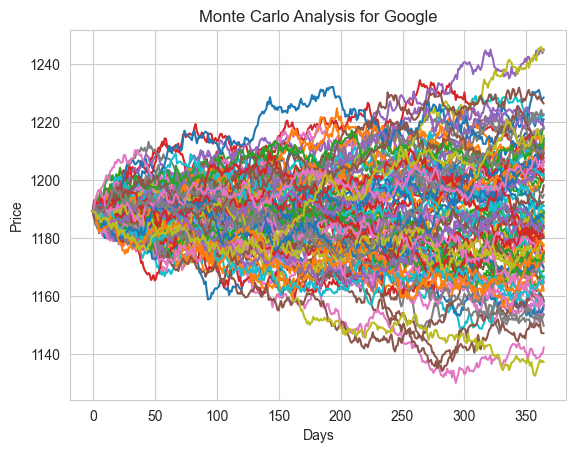

In [53]:
start_price = 1189.39 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

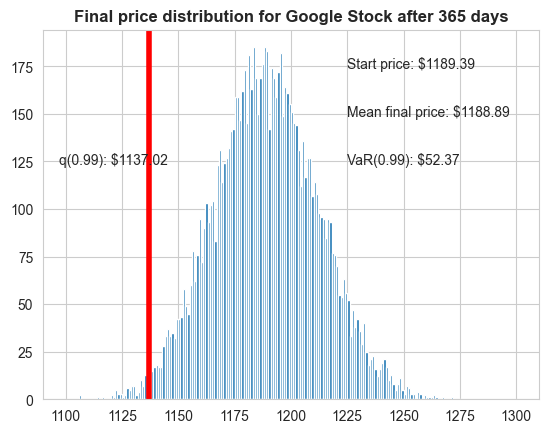

In [54]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

Interpretation:
There is 1% probability that the price will fall below $1137.02 in one year.
This results in a maximum expected loss of $52.37 at 99% confidence from the starting price.
The distribution is slightly right-skewed, indicating a longer tail of higher returns — typical for stock price simulations using geometric Brownian motion.

Conclusion about GOOGLE stock:
1) Stable long-term outlook: Monte Carlo suggests Google is not expected to fall significantly over a 1-year period, with mean ending price almost equal to start price. Indicates a relatively neutral expected return with low downside risk.

2) Low Value at Risk (VaR): $52.37 loss (4.7%) over 1 year is modest, supporting the idea that Google is a low-volatility stock.

3) Bootstrapping confirms small tail risk: -4.96% 1-day loss at the 1st percentile is also within normal bounds for a blue-chip tech stock.

4) Suitable for conservative investors: Given the low volatility and limited downside, GOOG may fit into a low-risk portfolio, though the expected return is also modest.
